**필요한 Package Import**

---

학습에 필요한 패키지를 선언해줍니다.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping


**Set Seed**

---
seed 값을 정해줍니다. 


In [2]:
seed = 222
numpy.random.seed(seed)
tf.random.set_seed(seed)

**MNIST Data Load**


---
MNIST 데이터를 load하여 reshape와 카테고리화를 진행합니다. 


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


**Model Architacture**


---
모델의 구조를 정의해줍니다.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

**Training**


---

학습을 진행합니다. 여기서 모델은 저장해주되, Loss가 떨어지지 않으면 EarlyStopping하게 됩니다. 

In [5]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.28620, saving model to ./model/01-0.2862.hdf5

Epoch 00002: val_loss improved from 0.28620 to 0.04591, saving model to ./model/02-0.0459.hdf5

Epoch 00003: val_loss improved from 0.04591 to 0.03032, saving model to ./model/03-0.0303.hdf5

Epoch 00004: val_loss improved from 0.03032 to 0.03025, saving model to ./model/04-0.0303.hdf5

Epoch 00005: val_loss improved from 0.03025 to 0.03017, saving model to ./model/05-0.0302.hdf5

Epoch 00006: val_loss improved from 0.03017 to 0.02601, saving model to ./model/06-0.0260.hdf5

Epoch 00007: val_loss did not improve from 0.02601

Epoch 00008: val_loss improved from 0.02601 to 0.02434, saving model to ./model/08-0.0243.hdf5

Epoch 00009: val_loss did not improve from 0.02434

Epoch 00010: val_loss did not improve from 0.02434

Epoch 00011: val_loss improved from 0.02434 to 0.02263, saving model to ./model/11-0.0226.hdf5

Epoch 00012: val_loss did not improve from 0.02263

Epoch 00013: val_loss did n

**Graph Create**


---

실험 결과에 따른 그래프를 작성합니다. 



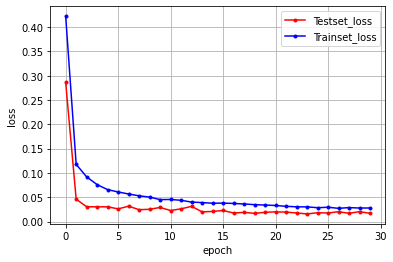

In [6]:
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()